<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyze-properties-of-the-interface-of-the-propagating-front-of-OsxGFP-positive-cells" data-toc-modified-id="Analyze-properties-of-the-interface-of-the-propagating-front-of-OsxGFP-positive-cells-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyze properties of the interface of the propagating front of OsxGFP positive cells</a></span><ul class="toc-item"><li><span><a href="#(1)-Interface-dynamics" data-toc-modified-id="(1)-Interface-dynamics-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>(1) Interface dynamics</a></span></li><li><span><a href="#Analyze-interface-profiles" data-toc-modified-id="Analyze-interface-profiles-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Analyze interface profiles</a></span><ul class="toc-item"><li><span><a href="#Load-processed-interface-data" data-toc-modified-id="Load-processed-interface-data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Load processed interface data</a></span></li></ul></li><li><span><a href="#Interface-dynamics-(first-two-moments)" data-toc-modified-id="Interface-dynamics-(first-two-moments)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Interface dynamics (first two moments)</a></span><ul class="toc-item"><li><span><a href="#Method-1:-intuitive-method" data-toc-modified-id="Method-1:-intuitive-method-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Method 1: intuitive method</a></span><ul class="toc-item"><li><span><a href="#(1)-Mean-interface-height-dynamics-$\langle-h(t)-\rangle-$" data-toc-modified-id="(1)-Mean-interface-height-dynamics-$\langle-h(t)-\rangle-$-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>(1) Mean interface height dynamics $\langle h(t) \rangle $</a></span></li><li><span><a href="#(2)-Width-dynamics-$w(t)$" data-toc-modified-id="(2)-Width-dynamics-$w(t)$-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>(2) Width dynamics $w(t)$</a></span></li></ul></li><li><span><a href="#Save-data" data-toc-modified-id="Save-data-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Save data</a></span></li></ul></li><li><span><a href="#Interface-roughness" data-toc-modified-id="Interface-roughness-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Interface roughness</a></span></li></ul></li></ul></div>

# Analyze properties of the interface of the propagating front of OsxGFP positive cells
## (1) Interface dynamics

<b>Version control</b><br>

Method 1 (method 2 for static images): overhang control. Use thresholded binary image, take largest contiguous region.
Method 2: Use phi_X method from Podewitz et al. (2016) to analyze moment equations.    

In [7]:
import numpy as np
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from pandas import DataFrame
from numpy import fft
import os
cwd = os.getcwd(); print("Working dir: " + cwd)

video = 1; video_idx = video-1; # python index
dates_all = ["190305", "190314", "200120", "170902"];
date = dates_all[video_idx];
folder_data = "/Users/dang/Documents/Projects/Tabler_skull/Data_Live_Imaging/{} Live Imaging/".format(date);
print("Save data in: " + folder_data)
folder_figures = os.path.split(cwd)[0] + "/Figures/Live_Imaging_{}/1_interface_dynamics/".format(date); 
print("Save plots in: " + folder_figures)

Working dir: /Users/dang/Documents/Projects/Tabler_skull/Scripts/Scripts_python
Save data in: /Users/dang/Documents/Projects/Tabler_skull/Data_Live_Imaging/190305 Live Imaging/
Save plots in: /Users/dang/Documents/Projects/Tabler_skull/Scripts/Figures/Live_Imaging_190305/1_interface_dynamics/


In [8]:
# --- Image settings ---
# Total image size in pixels
#size_px = np.array([3782, 2882]); # 190305
#size_px = np.array([5612, 2850]); # 190314/190315 after pruning
# To be precise, 190314: [5612, 2871] and 190315: [5606, 2880] 
# size_px = np.array([4734, 3925]); # 200120
size_px_all = np.array([[3782, 2882], [5612, 2850], [4734, 3925], [4643, 2886]]);

# Number of pixels per micron
#pix_per_micron = 4.400; # 190305
#pix_per_micron = 5.1040; # 190314
#pix_per_micron = 5.1040; # 200120
pix_per_micron_all = [4.400, 5.1040, 5.1040, 4.4034];

# Total size of image in microns
#size = np.array([859.55, 655]); # 190305
#size = np.array([1099.53, 562.5]); # 190314
#size = np.array([1098.35, 564.26]); # 190315
#size = np.array([927.51, 769.01]); # 200120

# Default image label
#im_label = "190305_MaxProjected_Stitched_dataset(0-12hr)_YD";
#im_label = "MaxProjected_Stitched_Blurred_190305_ML1_OsxGFP_Explant_Video_1(0-12hr)_YD";
#im_label = "MaxProjected_Stitched_190314_ML1_OsxGFP_Explant_Video_1_(0-16hr)";
#im_label = "MaxProjected_Stitched_200120_Live_Imaging_OsxGFP_E1375_12_hours";
im_label_all = ["190305_MaxProjected_Stitched_dataset(0-12hr)_YD", 
                "MaxProjected_Stitched_190314_ML1_OsxGFP_Explant_Video_1_(0-16hr)",
                "MaxProjected_Stitched_200120_Live_Imaging_OsxGFP_E1375_12_hours",
               "MAX_BLUR_20200414AQR_osx_E13.5_020917.lif - TileScan_003_Merging"];

In [9]:
im_label = im_label_all[video_idx];
pix_per_micron = pix_per_micron_all[video_idx];
size_px = size_px_all[video_idx];
Lx = size_px[0];

if video==4:
    Ly = 2861; # video 4 (170902): pre-processed interface, Ly = 2861;
else:
    Ly = size_px[1];  

## Analyze interface profiles

### Load processed interface data
16-bit images: intensity values in range 0-65535. Lower thresholds for cutting off very dark regions.
Process data using other notebook. Load processed data here.

In [10]:
# Load interface data
load_folder = folder_data + "/Interface_data/";
fname_in = load_folder + im_label + "_interfaces_data_processed" + ".csv";

interfaces_all_df = pd.read_csv(fname_in, index_col=0)
# Ly = interfaces_all_df.shape[1]; 

# convert to np array
interfaces_all_0 = np.array(interfaces_all_df); # unprocessed interface data
t_max = interfaces_all_0.shape[0]; # manually input number of time points

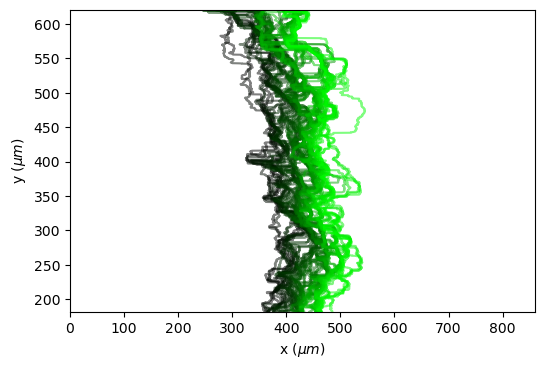

In [11]:
# Check loaded data by plotting interfaces
y_vals = np.arange(Ly);
# Cut out parts of interface for post-processing
# lower = 100;
# upper = -250; #-150;
lower = 800;
upper = -150;

h = plt.figure(dpi = 100);
for idx in np.arange(t_max):
    #plt.plot(interfaces_all_0[idx, lower:upper], y_vals[lower:upper], color=str(0.5*idx/t_max)); # in pixels
    #plt.plot(interfaces_all_0[idx, lower:upper]/pix_per_micron, y_vals[lower:upper]/pix_per_micron, color=str(0.5*idx/t_max)); # in microns
    plt.plot(interfaces_all_0[idx, lower:upper]/pix_per_micron, y_vals[lower:upper]/pix_per_micron, color=[0, idx/t_max, 0, 0.5] ); # in microns
    
plt.xlabel('x ($\mu m$)')
plt.ylabel('y ($\mu m$)')
plt.xlim(0, Lx/pix_per_micron)
#plt.ylim(0, Ly/pix_per_micron)
plt.ylim(lower/pix_per_micron, (Ly+upper)/pix_per_micron)

# Save image
fname_out = folder_figures + im_label + "interface_profile_all_samples_brighter_is_later_t_w_offset";
#plt.savefig(fname_out + ".pdf")
#plt.savefig(fname_out + ".png")

plt.show()

In [13]:
# Optional: save processed interfaces
interfaces_all = interfaces_all_0[:, lower:upper];

# Save processed interface
fname_out = load_folder + im_label + "_interfaces_data_processed_lower_{}_upper_{}.csv".format(lower, upper);
interfaces_all_df = pd.DataFrame(interfaces_all)
#interfaces_all_df.to_csv(fname_out);

## Interface dynamics (first two moments)
We now determine how the interface height and width evolve over time. <br>

<u>Fisher waves</u><br>
Recall that the Fisher–KPP equation is <br>
    $\hspace{1cm} \partial_t u = D \partial_{xx} u + f(u), \hspace{1cm} f(u) = k u (1-u) $ <br>
For a Fisher wave, the interface grows linearly with time, $\langle h(t) \rangle = v t$. The deterministic model predicts $v = 2 \sqrt{D f'(0)} = 2 \sqrt{D k}$. The stochastic model based on $A \leftrightarrow A + A$ predicts $v = Dk$ in $d=1$ (Moro, PRL 2001). <br>

For the width, different scaling relations for before the saturating regime have been obtained (recall $w(t) \sim t^{\beta}$). Riordan et al. (PRL, 1995) do numerically study the stochastic process on a 2D grid and obtain diffusive scaling, i.e. $\beta=1/2$. Moro (PRL, 2001) shows that with a different interface definition, $\beta = 0.27 \pm 0.01$. 

<u>Other interface growth models</u> <br>
Tumor growth: linear expansion (Bru et al., PRL 1998 & BPJ 2003), also confirmed in CA model simulations by Block et al., 2007.
Monolayer Vero cell colony (Huergo et al., 2010): linear expansion of colony height. $\beta = 0.33$ for large colonies, but $\beta$ depends on system size $l$. 


### Method 1: intuitive method
Define the average interface height as $\langle h(t) \rangle = \frac{1}{L} \int h(y,t)\ dy$. <br>
Define the second moment $\langle h(t)^2 \rangle = \frac{1}{L} \int h(y,t)^2\ dy$. <br>
The width is then defined as $w(L, t) = \sqrt{\langle h(t)^2 \rangle - \langle h(t) \rangle^2}$.

#### (1) Mean interface height dynamics $\langle h(t) \rangle $

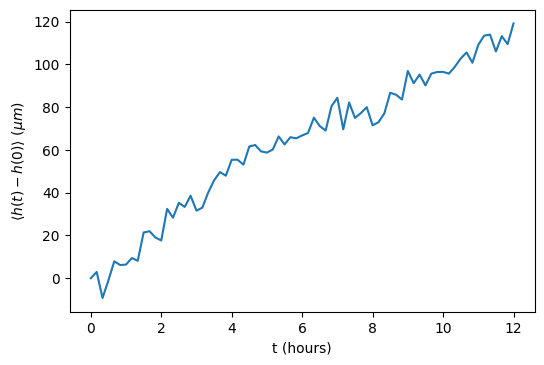

In [8]:
heights_all_1 = np.nanmean(interfaces_all, axis=1)/pix_per_micron;
#heights_all_2 = np.nanmean(interfaces_all_2, axis=1)/pix_per_micron;
heights_all_norm = heights_all_1 - heights_all_1[0];
t_all = np.arange(t_max)/6;

h = plt.figure(dpi = 100);
plt.plot(t_all, heights_all_norm); #, label='unblurred')
#plt.plot(t_all, heights_all_2, label='blurred')
plt.xlabel('t (hours)')
plt.ylabel('$\\langle h(t) - h(0) \\rangle$ ($\mu m$)')

# Fit linear function h = a*t + b, plot result
# slope, intercept, r_value, p_value, std_err = stats.linregress(t_all, heights_all_norm) 
# plt.plot(t_all, slope*t_all + intercept, '--', label='$<h> \propto t$' + ', v = ' + str(round(slope, 2)) + '$\mu m/hr$')

# # # Fit sqrt function h = b sqrt(a t)
# def func(t, a, b):
#     return a*np.sqrt(t) + b;
# popt, pcov = optimize.curve_fit(func, t_all, heights_all_norm)

# plt.plot(t_all, popt[0]*np.sqrt(t_all) + popt[1], '--', label='$<h> \propto t^{1/2}$')

# plt.legend();
#plt.xscale('log')
#plt.yscale('log')

# Save image
fname_out = folder_figures + im_label + "interface_avg_height_dynamics";
label = '_method_1';
# plt.savefig(fname_out + label + ".png")
# plt.savefig(fname_out + label + ".pdf")

plt.show()

No handles with labels found to put in legend.


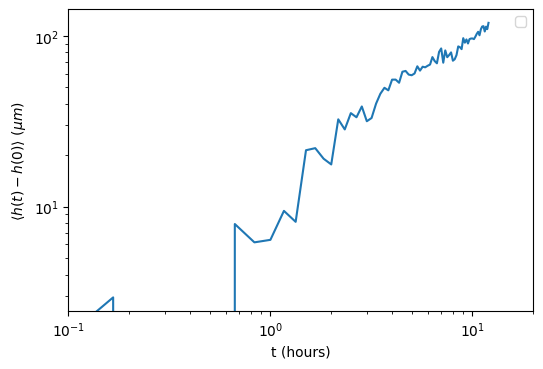

In [9]:
# --- Plot on log-log scale ---
#heights_all_1 = np.nanmean(interfaces_all, axis=1)/pix_per_micron; 
t_all = np.arange(t_max)/6; 

# Fit linear function h = a*t + b
slope, intercept, r_value, p_value, std_err = stats.linregress(t_all, heights_all_norm) 
# Fit sqrt function h = b sqrt(a t)
def func(t, a, b):
    return a*np.sqrt(t) + b;
popt, pcov = optimize.curve_fit(func, t_all, heights_all_norm)

# Plot (rescaled) data
h = plt.figure(dpi = 100);
plt.plot(t_all, heights_all_norm); #, label='unblurred')
#plt.plot(t_all, heights_all_2 - heights_all_2[0], label='blurred')
plt.xlabel('t (hours)')
plt.ylabel('$\\langle h(t) - h(0) \\rangle$ ($\mu m$)')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**(-1), 20)

# Plot fit functions
# t_sel = np.array([0.1, 1, 10, 20]);
# plt.plot(t_sel, slope*t_sel, '--', label='$<h> \propto t$' + ', v = ' + str(round(slope, 2)) + '$\mu m/hr$')
# plt.plot(t_sel, popt[0]*np.sqrt(t_sel), '--', label='$<h> \propto t^{1/2}$')

# Plot linear and sqrt scaling
t_sel = np.array([1, 5]);
# plt.plot(t_sel, 3*slope*t_sel, '--', label='$<h> \propto t$' + ', v = ' + str(round(slope, 2)) + '$\mu m/hr$')
#plt.plot(t_sel, popt[0]*np.sqrt(t_sel), '--', label='$<h> \propto t^{1/2}$')

plt.legend();

# Save image
fname_out = folder_figures + im_label + "interface_avg_height_dynamics_log_log";
label = '_method_1';
# plt.savefig(fname_out + label + ".pdf")
# plt.savefig(fname_out + label + ".png")

plt.show()

The scaling behavior appears to be mostly diffusive ($\propto t^{1/2}$), but not fully conclusive.

#### (2) Width dynamics $w(t)$
Define the width as $w(t) := \sqrt{\langle h^2\rangle - \langle h \rangle^2} = \left[ \frac{1}{L} \int_{0}^{L} dx \left( h(x,t) - \bar{h}(t) \right)^2 \right]^{1/2} $. <br>
Plot $w(L, t)$ vs $t$ for a image series.

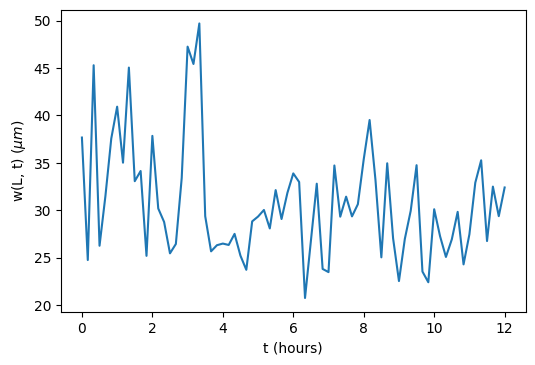

In [10]:
t_all = np.arange(t_max)/6; # time between frames = 10 min.
widths_all_1 = np.zeros(t_max);
#widths_all_2 = np.zeros(t_max);
#interface_lengths = np.zeros(t_max); # store number of interface coordinates per time

for idx in np.arange(t_max):
    interface = interfaces_all[idx];
    #interface_lengths[idx] = np.sum(~np.isnan(interface));
    widths_all_1[idx] = np.std( interface[~np.isnan(interface)] )/pix_per_micron;
#   interface_2 = interfaces_all_2[idx];
#   widths_all_2[idx] = np.std( interface_2[~np.isnan(interface_2)] )/pix_per_micron;

# -- Check that interface lengths are roughly equal --
# plt.figure();
# plt.plot(interface_lengths)
# plt.ylim(0, 3000)
# plt.xlabel('t')
# plt.ylabel('Interface length (pixels)')

plt.figure(dpi=100);
plt.plot(t_all, widths_all_1); #, label='unblurred')
#plt.plot(t_all, widths_all_2, label='blurred')
#plt.ylim(0, 250)
plt.xlabel('t (hours)')
plt.ylabel('w(L, t) ($\mu m$)')
# plt.title('Dynamics of interface width')
#plt.legend()

# Save image
fname_out = folder_figures + im_label + "interface_width_dynamics";
label = '_method_1';
# plt.savefig(fname_out + label + ".pdf")
# plt.savefig(fname_out + label + ".png")

plt.show()

### Save data

In [22]:
save_folder = "/Users/dang/Documents/TablerLab/Data_Live_Imaging/Analyzed_height_vs_t/"
data_out = pd.DataFrame([t_all, heights_all_norm, widths_all_1], index=["time", "interface_height", "interface_width"]).T;
fname_out = "Video_{}_{}_interface_h_w_method_1.csv".format(video, date);

data_out.to_csv(save_folder + fname_out)

## Interface roughness

In [82]:
binsize = 10

def bin_data(data, binsize):
    # bins the data, adds cells to the last bin to match size and then take avg over each bin
    
    nbins = int(np.ceil(data.shape[0]/binsize));
    value_impute = np.mean( data[ binsize*(nbins-1): ]  ) # fill extra bins with value_impute
    n_add = binsize*(nbins) - data.shape[0]; # number of elements to add 

    if n_add>0:    
        data = np.concatenate((data, value_impute*np.ones(n_add)))

    return list(map(np.mean, data.reshape([nbins, binsize]) ))

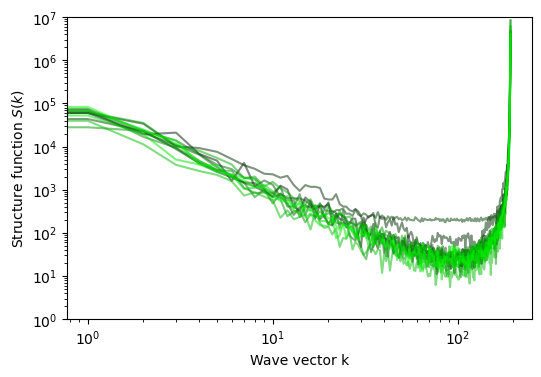

In [85]:
t_selected = np.arange(0, t_max, 6);

plt.figure(dpi=100)
for idx in np.arange(len(t_selected)):    
    t = t_selected[idx];
    interface = interfaces_all[t]; 
    h_all = interface[~np.isnan(interface)]; # filter out nan
    
    this_S_all = fft.fft(h_all)*fft.ifft(h_all); # h(-k) obtained from inverse FFT
    
    # Unbinned data
    # plt.plot(np.real(this_S_all), color=[0, t/t_max, 0, 0.5] )  
    
    # ==(Optional) bin the data==
    S_fft_binned = bin_data(this_S_all, binsize)
    plt.plot(np.real(S_fft_binned), color=[0, t/t_max, 0, 0.5] )  
    # ====
    
    #this_label = "t = " + str(t/6) + 'h';
    #plt.plot(this_S_all, label=this_label)  

# Plot power laws 
k_range = 10**np.arange(0, 2.5, 0.2);

exponent = -1;
c = (10**4.5);
S_range = c*k_range**exponent;
# plt.plot(k_range, S_range, 'k--')
# # plt.text(10**(1), 10**(2.5), 'slope = ' + str(exponent) )
# plt.text(10**(1), 10**(2), 'alpha = ' + str( round(-(exponent+1)/2, 3) ) )

exponent2 = -2;
c2 = (10**3.5)
S_range2 = c2*k_range**exponent2;
#plt.plot(k_range, S_range2, 'k--')
# plt.text(10**(1), 10**8, 'slope=' + str( exponent2 ) )
# plt.text(10**(1), 10**(-0.5), 'alpha=' + str( round(-(exponent2+1)/2, 3) ) )

plt.xscale('log')
plt.yscale('log')
#plt.title('Structure function from 1 image')
plt.xlabel('Wave vector k')
plt.ylabel('Structure function $S(k)$')
#plt.legend()
plt.ylim(1, 10**7)

# Save image
fname_out = folder_figures + im_label + "structure_factor_all_brighter_is_later_t_v2";
# plt.savefig(fname_out + ".pdf")
# plt.savefig(fname_out + ".png")

plt.show()

(1, 10000000)

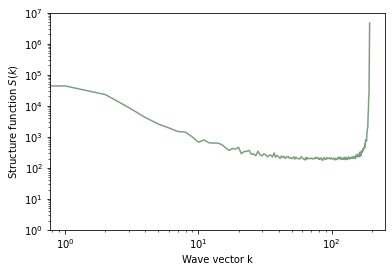

In [92]:
t = t_selected[3];

interface = interfaces_all[t]; 
h_all = interface[~np.isnan(interface)]; # filter out nan

this_S_all = fft.fft(h_all)*fft.ifft(h_all); # h(-k) obtained from inverse FFT

# Unbinned data
# plt.plot(np.real(this_S_all), color=[0, t/t_max, 0, 0.5] )  

# ==(Optional) bin the data==
S_fft_binned = bin_data(this_S_all, binsize)
plt.plot(np.real(S_fft_binned), color=[0, t/t_max, 0, 0.5] ) 

plt.xscale('log')
plt.yscale('log')
#plt.title('Structure function from 1 image')
plt.xlabel('Wave vector k')
plt.ylabel('Structure function $S(k)$')
#plt.legend()
plt.ylim(1, 10**7)